In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

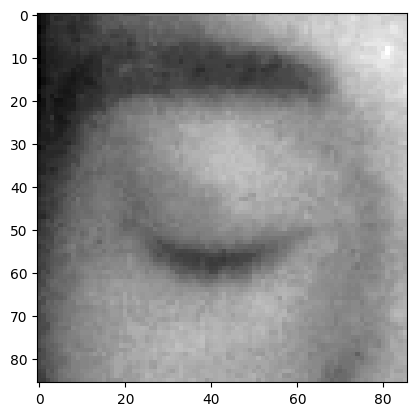

In [6]:
img_path = r"C:\Users\KIIT0001\CVPR Project\Drowsiness\Close-Eyes\s0001_00001_0_0_0_0_0_01.png"
img_array= cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')

In [7]:
img_array.shape

(86, 86)

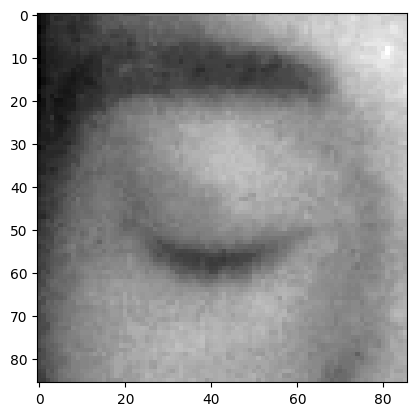

In [10]:
Datadirectory = r"C:\Users\KIIT0001\CVPR Project\Drowsiness"
Classes = ["Close-Eyes", "Open-Eyes"]
for Category in Classes:
  path = os.path.join(Datadirectory, Category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break
  break

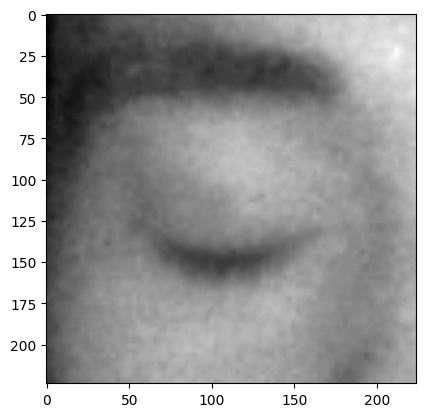

In [11]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datapath = r"C:\Users\KIIT0001\CVPR Project\Drowsiness"
img_size = 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    datapath,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    datapath,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale',
    subset='validation'
)

Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (img_size,img_size,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])
model.summary()

C:\Users\KIIT0001\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,033 (169.36 MB)

 Trainable params: 44,396,033 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [15]:
epochs = 20
history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator
)

C:\Users\KIIT0001\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 7153s 3s/step - accuracy: 0.9345 - loss: 0.1743 - val_accuracy: 0.8457 - val_loss: 0.4399
Epoch 2/20
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 2365s 1s/step - accuracy: 0.9718 - loss: 0.0842 - val_accuracy: 0.8264 - val_loss: 0.4431
Epoch 3/20
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 2360s 1s/step - accuracy: 0.9804 - loss: 0.0588 - val_accuracy: 0.8645 - val_loss: 0.4479
Epoch 4/20
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 7454s 4s/step - accuracy: 0.9840 - loss: 0.0471 - val_accuracy: 0.8558 - val_loss: 0.3956
Epoch 5/20
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 3638s 2s/step - accuracy: 0.9866 - loss: 0.0403 - val_accuracy: 0.8061 - val_loss: 0.8429
Epoch 6/20
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 2354s 1s/step - accuracy: 0.9877 - loss: 0.0354 - val_accuracy: 0.8474 - val_loss: 0.5678
Epoch 7/20
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 2361s 1s/step - accuracy: 0.9893 - loss: 0.0341 - val_accuracy: 0.8633 - val_loss: 0.4815
Epoch 8/20
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 2353s 1s/step - accuracy: 0.9903 -

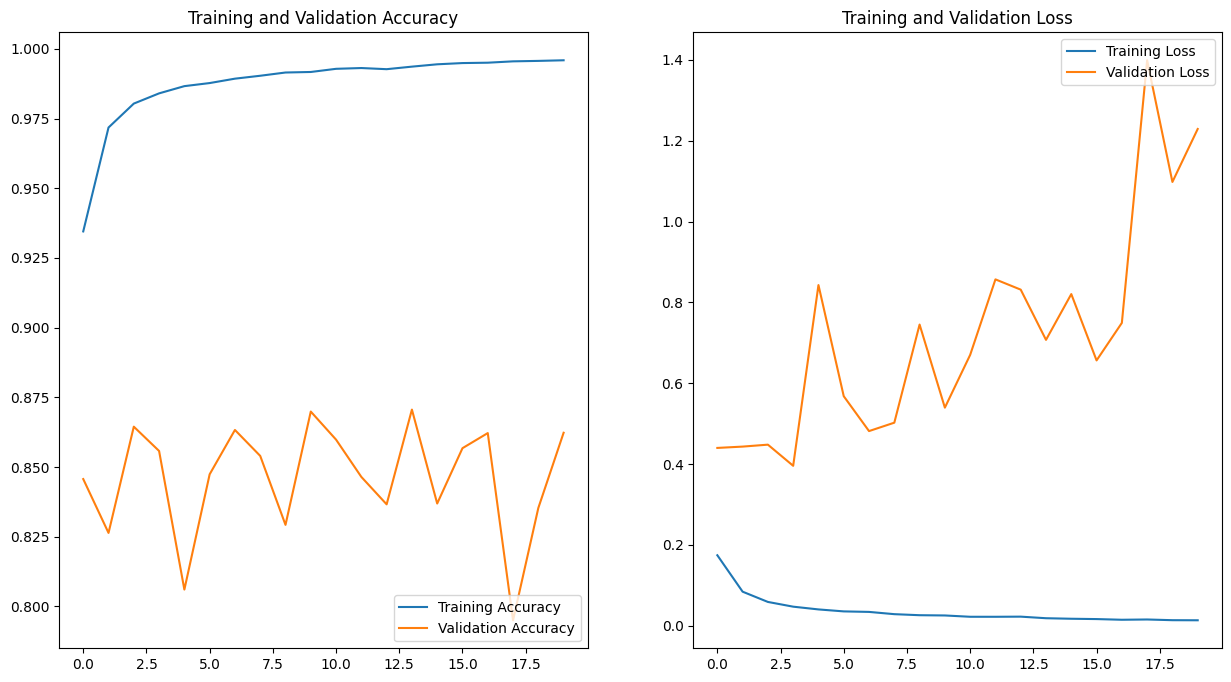

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
model.save('drowsiness.h5')

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model(r"C:\Users\KIIT0001\CVPR Project\drowsiness.h5")
face_cascade = cv2.CascadeClassifier(r"C:\Users\KIIT0001\CVPR Project\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\KIIT0001\CVPR Project\haarcascade_eye.xml")

img_size = 224
drowsy_counter = 0
DROWSY_THRESHOLD = 15

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.flip(frame, 1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    if len(faces) == 0:
        cv2.putText(frame, "No face detected", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=3)
        if len(eyes) == 0:
            drowsy_counter += 1
        else:
            predictions = []
            for (ex, ey, ew, eh) in eyes:
                eye_img = roi_gray[ey:ey+eh, ex:ex+ew] 
                final_image = cv2.resize(eye_img, (img_size, img_size))
                final_image = final_image.reshape(1, img_size, img_size, 1)
                final_image = final_image / 255.0
                prediction = model.predict(final_image, verbose=0)
                predictions.append(prediction[0][0])
            if len(predictions) > 0:
                avg_pred = np.mean(predictions)
                if avg_pred > 0.5:
                    status = "Open Eyes"
                    color = (0, 255, 0)
                    drowsy_counter = 0
                else:
                    status = "Closed Eyes"
                    color = (0, 0, 255)
                    drowsy_counter += 1
                cv2.putText(frame, status, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
        if drowsy_counter > DROWSY_THRESHOLD:
            cv2.putText(frame, "DROWSINESS ALERT!", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3)
    cv2.imshow('Drowsiness Detection (Press Q to Quit)', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()